In [1]:
#importing the required modules

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
#loading the dataset as csv file
data = pd.read_csv("haemoglobin_test.csv")
data

,Name,Age,Gender,Weight,Hb(gms%),BP(mmHg),Blood Group
0,Chinnaswamy D.,19,M,80,15.7,110/80,A+
1,Nikhil Raj,22,M,102,16.6,130/70,O+
2,Sharvesh Vikranth,19,M,89,15.6,142/80,A+
3,G. Narendran,33,M,92,14.1,142/82,O+
4,Pradesh Yadav,19,M,64,14.1,100/70,AB+
...,...,...,...,...,...,...,...
77,Roshna Sharon,20,F,48,12.5,100/60,A+
78,Dharun Thota,19,M,72,13.7,110/60,A+
79,Pawan Kumar,26,M,60,13.2,120/70,O+
80,Magesh S.,24,M,75,13.9,140/90,A+


In [3]:
data.shape

(82, 7)

In [4]:
#removing the duplicates
data.drop_duplicates(inplace=True)
print(data.info())
print(data.to_string())
data.columns     # to know how many columns are present in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 81
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         80 non-null     object 
 1   Age          80 non-null     int64  
 2   Gender       80 non-null     object 
 3   Weight       80 non-null     int64  
 4   Hb(gms%)     80 non-null     float64
 5   BP(mmHg)     80 non-null     object 
 6   Blood Group  80 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.0+ KB
None
                       Name  Age Gender  Weight  Hb(gms%) BP(mmHg) Blood Group
0            Chinnaswamy D.   19      M      80      15.7   110/80          A+
1                Nikhil Raj   22      M     102      16.6   130/70          O+
2         Sharvesh Vikranth   19      M      89      15.6   142/80          A+
3              G. Narendran   33      M      92      14.1   142/82          O+
4             Pradesh Yadav   19      M      64      14.1   100

Index(['Name', 'Age', 'Gender', 'Weight', 'Hb(gms%)', 'BP(mmHg)',
       'Blood Group'],
      dtype='object')

In [5]:
min_Hb = data['Hb(gms%)'].min()
print('Minimum Hb rate : ',min_Hb)
max_Hb = data['Hb(gms%)'].max()
print('Maximum Hb rate : ',max_Hb)

Minimum Hb rate :  12.5
Maximum Hb rate :  18.1


In [6]:
data_modf = data.drop(columns=['Name','Gender','Blood Group','BP(mmHg)'])
corr_mat = data_modf.corr(method='pearson')
print("Correlation matrix is : ")
print(corr_mat)
print("\n<---------------------  original data ----------------------->\n")
print(data.head(5))

Correlation matrix is : 
               Age    Weight  Hb(gms%)
Age       1.000000  0.286132  0.081322
Weight    0.286132  1.000000  0.216816
Hb(gms%)  0.081322  0.216816  1.000000

<---------------------  original data ----------------------->

                Name  Age Gender  Weight  Hb(gms%) BP(mmHg) Blood Group
0     Chinnaswamy D.   19      M      80      15.7   110/80          A+
1         Nikhil Raj   22      M     102      16.6   130/70          O+
2  Sharvesh Vikranth   19      M      89      15.6   142/80          A+
3       G. Narendran   33      M      92      14.1   142/82          O+
4      Pradesh Yadav   19      M      64      14.1   100/70         AB+


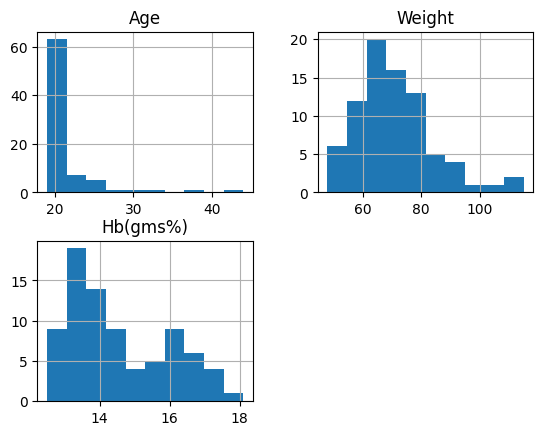

In [7]:
#histogram plot of the parameters
data.hist()
plt.show()

In [8]:
#counting the no.of males and females
gender = data['Gender'].value_counts()
print(gender)

Gender
M    77
F     3
Name: count, dtype: int64


[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

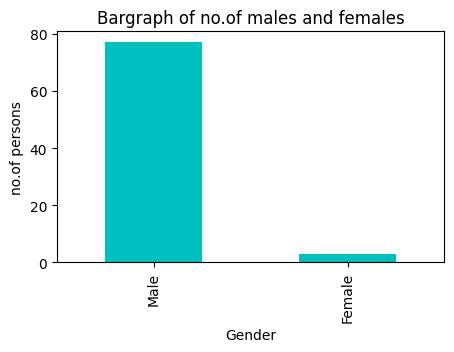

In [20]:
fig = plt.figure(figsize =(5, 3))
ax = gender.plot(kind='bar',color='c')
ax.set_title('Bargraph of no.of males and females')
ax.set_xlabel('Gender')
ax.set_ylabel('no.of persons')
ax.set_xticklabels(('Male','Female'))

<Axes: title={'center': 'Box plot before handling outliers'}>

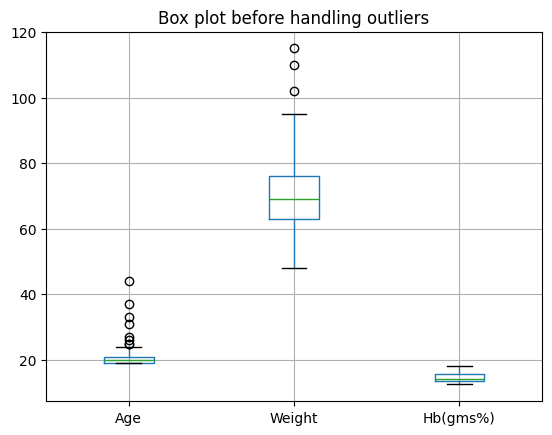

In [10]:
# fig = plt.figure(figsize =(10, 7))
# plt.boxplot(data)
# plt.show()
plt.title("Box plot before handling outliers")
data.boxplot(figsize=(3,3))

[]

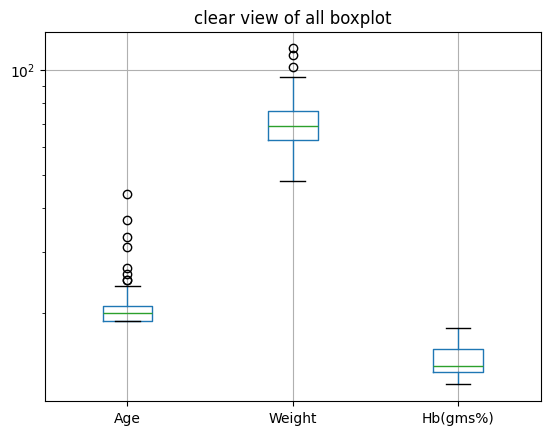

In [11]:
plt.title("clear view of all boxplot")
data.boxplot(figsize=(6,4))
plt.semilogy()

In [12]:
# handling ouliers 
def handling_outliers(data,features):
    for x in features:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        diff = Q3 - Q1
        lb = Q1 - 1.5*diff
        ub = Q3 + 1.5*diff
        data[x] = np.where(data[x]<lb,data[x].median(),data[x])
        data[x] = np.where(data[x]>ub,data[x].median(),data[x])
    return data

[]

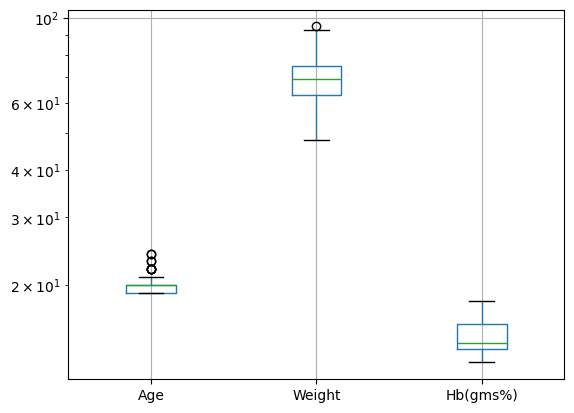

In [13]:
haemoglobin_test = ['Age','Weight','Hb(gms%)']
data = handling_outliers(data,haemoglobin_test)
data.boxplot()
plt.semilogy()

In [22]:
data_for_sort = data.drop(columns=['Name','Gender','Blood Group','BP(mmHg)'])
sort_data = np.sort(data_for_sort)
sort_data

array([[15.7, 19. , 80. ],
       [16.6, 22. , 69. ],
       [15.6, 19. , 89. ],
       [14.1, 20. , 92. ],
       [14.1, 19. , 64. ],
       [16.6, 19. , 67. ],
       [16.9, 20. , 65. ],
       [14.1, 20. , 70. ],
       [14.3, 20. , 70. ],
       [16. , 19. , 75. ],
       [14.1, 22. , 71. ],
       [16. , 21. , 81. ],
       [18.1, 20. , 69. ],
       [17. , 20. , 61. ],
       [14. , 19. , 68. ],
       [14.2, 20. , 72. ],
       [13.6, 19. , 66. ],
       [15.2, 19. , 60. ],
       [16.3, 19. , 67. ],
       [14.4, 20. , 80. ],
       [13. , 19. , 68. ],
       [16.1, 19. , 76. ],
       [16.6, 19. , 67. ],
       [13.6, 19. , 67. ],
       [13.6, 19. , 65. ],
       [13.7, 19. , 84. ],
       [13.3, 19. , 55. ],
       [13.2, 21. , 64. ],
       [13.5, 22. , 66. ],
       [16. , 19. , 77. ],
       [13.6, 20. , 65. ],
       [12.9, 19. , 57. ],
       [13.5, 19. , 63. ],
       [13.9, 19. , 75. ],
       [13.4, 21. , 75. ],
       [14.9, 19. , 59. ],
       [13.6, 19. , 72. ],
 

In [15]:
sort_by_Hb = data.sort_values(by=['Hb(gms%)'])
print(sort_by_Hb.to_string())

                       Name   Age Gender  Weight  Hb(gms%) BP(mmHg) Blood Group
77           Roshna Sharon   20.0      F    48.0      12.5   100/60          A+
69                  Ashrith  19.0      M    66.0      12.7   102/80          O+
65            Monish Balaji  19.0      M    58.0      12.8   120/80          B+
76    Vaishnavi R. Mandhani  21.0      F    73.0      12.8   102/70          B+
73             Harshmith B.  19.0      M    82.0      12.8   130/70          A+
66               Kasim Khan  19.0      M    58.0      12.9   120/70          O+
33           Prahaladh A.R.  19.0      M    57.0      12.9   120/80          O+
53           Tarun Eswar R.  23.0      M    75.0      13.0   120/80          A+
20           Swaraj Gambhir  19.0      M    68.0      13.0   110/70          B+
79              Pawan Kumar  20.0      M    60.0      13.2   120/70          O+
29           Khushal Gautam  21.0      M    64.0      13.2   110/70          B+
28          Agna Rose Binoy  19.0      M

In [16]:
blood_groups = data['Blood Group'].value_counts()
blood_groups

Blood Group
A+     24
O+     24
B+     22
AB+     8
B-      1
O-      1
Name: count, dtype: int64

Text(0, 0.5, 'no.of students')

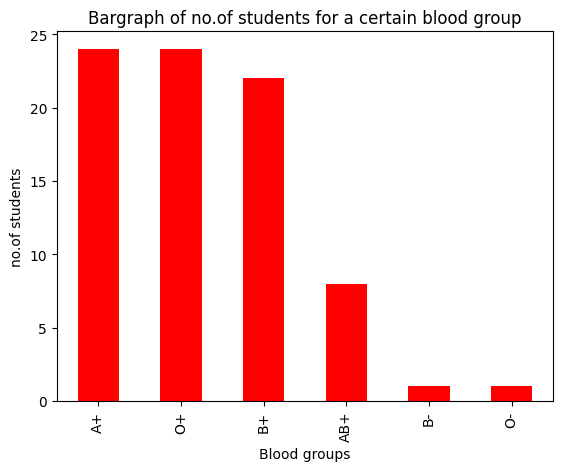

In [17]:
ax = blood_groups.plot(kind='bar',color='r')
ax.set_title('Bargraph of no.of students for a certain blood group')
ax.set_xlabel('Blood groups')
ax.set_ylabel('no.of students')

DONOR ELIGIBILITY CRITERIA
Age               : 18-60 years
Weight            : more than 50kgs
Haemoglobin       : >= 12.5gms%
Pulse             : 60-100
B.P               : 100/60 - 150/100 mmHg

Previous donation beyond 90 days

<Axes: >

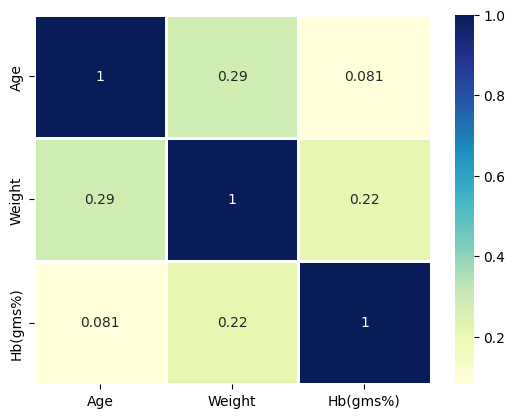

In [18]:
#heat_map = sb.load_dataset('haemoglobin_test.csv')
sb.heatmap(corr_mat,cmap = "YlGnBu", linecolor = 'white', linewidths = 1,annot = True)